<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# **Boston Housing Data - Descriptive Statistics, Visualizations and Tests**

#### Import the required libraries we need for the lab.


In [1]:
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import scipy.stats

#### Read the dataset in the csv file from the URL


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.to_csv('housing-prices.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df = boston_df.drop(['Unnamed: 0'], axis=1)

The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

#### Task 2: Generate Descriptive Statistics and Visualizations

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
boston_df.shape

(506, 13)

In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df['MEDV'].median()

21.2

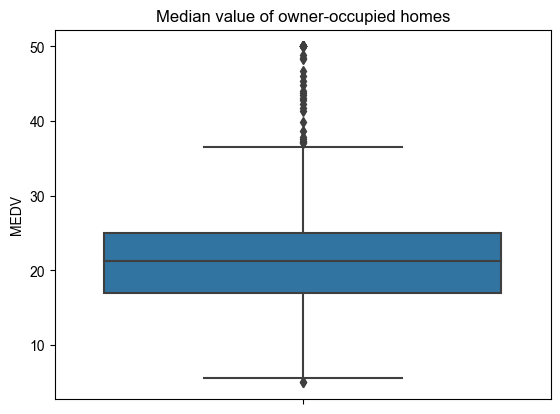

In [12]:
# "Median value of owner-occupied homes" boxplot

ax = sns.boxplot(y="MEDV", data=boston_df)
sns.set_style("whitegrid")
plt.title("Median value of owner-occupied homes")
plt.show()

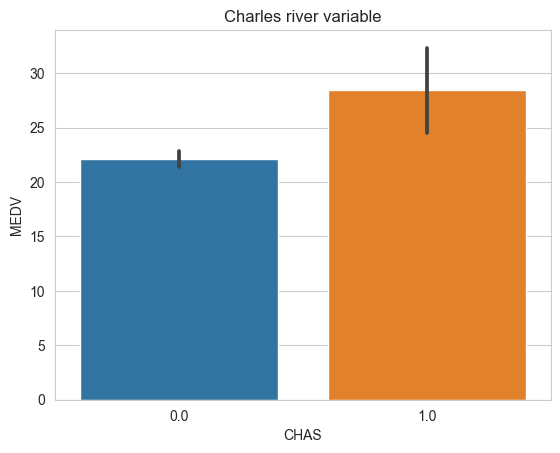

In [13]:
# "Charles river variable" barplot

ax = sns.barplot(y="MEDV", x="CHAS", data=boston_df)
plt.title("Charles river variable")
plt.show()

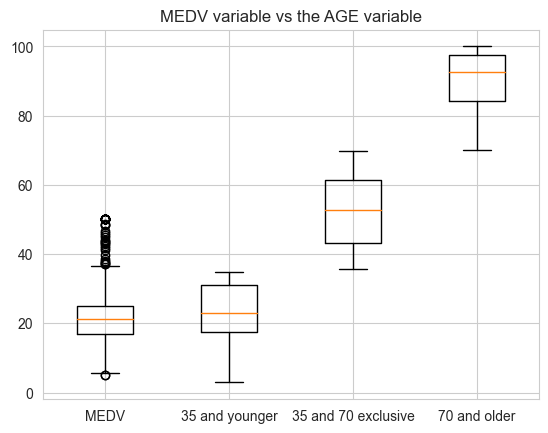

In [14]:
# MEDV variable vs the AGE variable boxplot
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

thirty_five_and_younger = boston_df.loc[(boston_df['AGE'] <= 35), 'AGE']
between_thirty_five_and_seventy = boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE']
seventy_and_older = boston_df.loc[(boston_df['AGE'] >= 70), 'AGE']

labels = ['MEDV', '35 and younger', '35 and 70 exclusive', '70 and older']
plt.boxplot([boston_df["MEDV"], thirty_five_and_younger, between_thirty_five_and_seventy, seventy_and_older], labels=labels)
plt.title("MEDV variable vs the AGE variable")
plt.show()

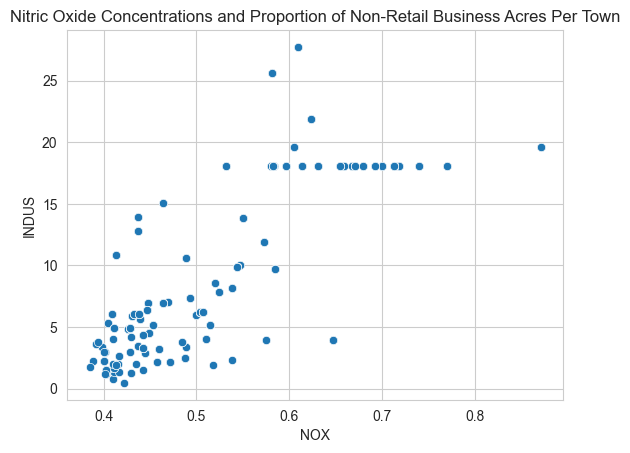

In [15]:
# Nitric oxide concentrations and Proportion of non-retail business acres per town scatter plot 

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres Per Town")
plt.show()

# What can you say about the relationship?
# There is a higher proportion of non-retail business acres per town where the Nitric oxide concentrations is less

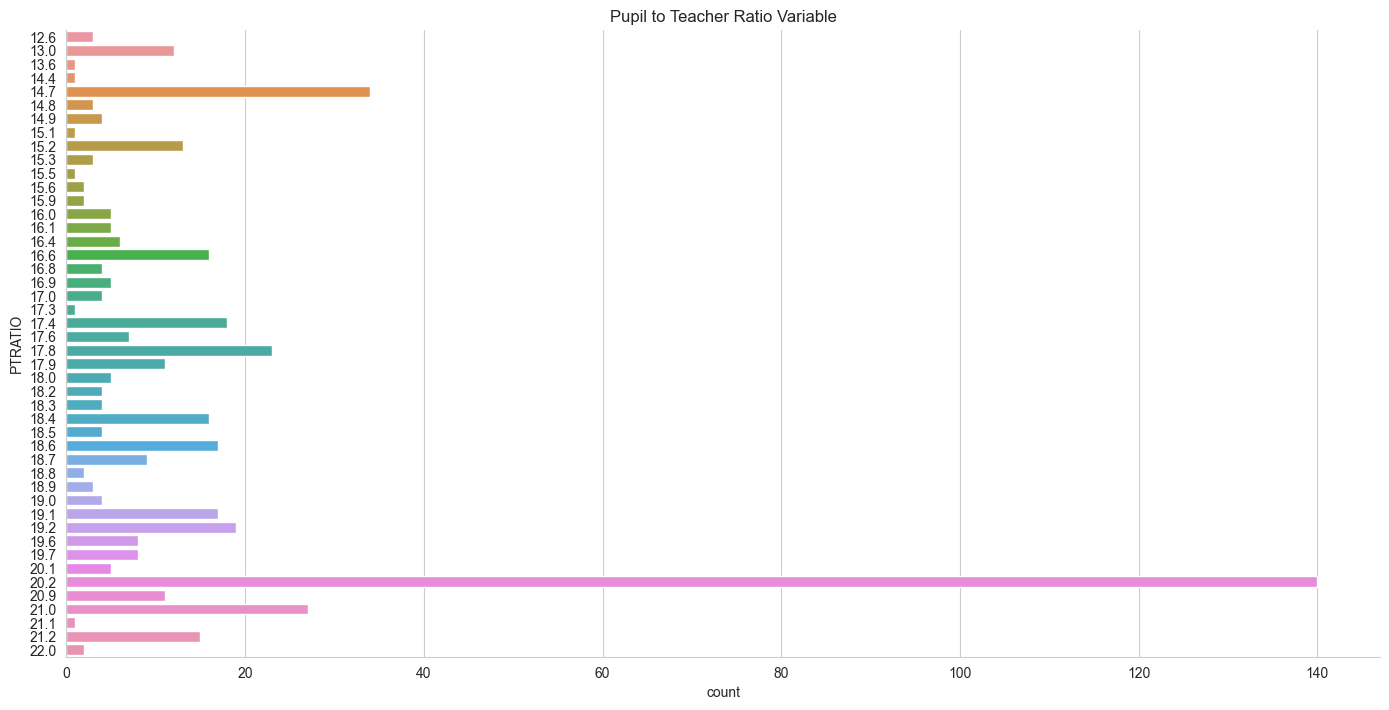

In [16]:
# histogram for pupil to teacher ratio variable

sns.catplot(y='PTRATIO', kind='count', data=boston_df, height=7, aspect=2)
plt.title("Pupil to Teacher Ratio Variable")
plt.show()

#### Task 3: Use the appropriate tests to answer the questions provided.

In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [18]:
# Be sure to:
# 1.	State your hypothesis.
# 2.	Use α = 0.05
# 3.	Perform the test Statistics.
# 4.	State the conclusion from the test.

In [19]:
# •	Is there a significant difference in median value of houses bounded by the 
# Charles river or not? (T-test for independent samples)

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)
# The p-value is less than 0.05 that means that - we will reject the null hypothesis that 
# there is a significant difference in median value of houses bounded by the Charles River dummy variable

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [20]:
# •	Is there a difference in Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

boston_df.loc[(boston_df['AGE'] < 85), 'age_group'] = '84 years and younger'

lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df       sum_sq    mean_sq   F  PR(>F)
age_group    0.0      0.00000        NaN NaN     NaN
Residual   295.0  17809.59375  60.371504 NaN     NaN


In [21]:
# •	Can we conclude that there is no relationship between 
# Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])
# The p-value is less than 0.05 that means that - we will reject the null hypothesis that 
# there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

PearsonRResult(statistic=-0.42732077237328253, pvalue=7.065041586253742e-24)

In [22]:
# •	What is the impact of an additional weighted distance to the 
# five Boston employment centres on the median value of 
# owner occupied homes? (Regression analysis)

X = pd.get_dummies(boston_df[['age_group']])

y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# we will reject the null hypothesis since the p-value is less than 0.05 
# there is significant evidence that there is 
# a difference in Median values of houses (MEDV) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     70.12
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.55e-16
Time:                        10:11:42   Log-Likelihood:                -1807.3
No. Observations:                 506   AIC:                             3619.
Df Residuals:                     504   BIC:                             3627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             18.7205      0.595     31.451      0.000      17.551      19.890
age_group_84 years and younger     6.5170      0.778      8.374      0.000       4.988       8.046
==============================================================================
Omnibus:                      163.399   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.843
Skew:                           1.611   Prob(JB):                     4.58e-94
Kurtosis:                       6.163   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""